# Intelligent Systems 3: Probabilistic and Deep Learning
#### Exam number:

In [48]:
import math

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import lstsq
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, ElasticNetCV
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import torch
import torch.nn as nn
import os
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, utils
from skimage import io,transform
from torchvision import datasets
from torchvision.transforms import ToTensor, ToPILImage, RandomCrop

In [135]:
def plot_model(model, x_test, y_test):
    prediction = model.predict(x_test)
    true_value = y_test.iloc[0]
    predicted_value = prediction[0]
    print(f"Next True value: {true_value} Next predicted value: {predicted_value} Relative Error: {abs((predicted_value-true_value)/true_value)*100}%")
    plt.figure(figsize=(10,5))
    plt.scatter(target.index, target)
    plt.plot(target.index, target, color="black")
    plt.scatter(y_test.index,prediction, color="green")
    plt.show()


# 1 Using Regression

## Basic Regression

In [136]:
df = pd.read_csv("data.csv")

In [137]:
target = df["D"].copy()
df["D"] = target.shift(1,fill_value=target[0])
df.drop("D",axis=1,inplace=True)

In [138]:
x_train, x_test, y_train, y_test = train_test_split(df,target,shuffle=False,test_size=20)

In [139]:
model = LinearRegression()

In [140]:
model.fit(x_train,y_train)

LinearRegression()

In [141]:
str(model.predict(x_test)[0])

'0.936608144922934'

In [142]:
r2_score(y_test, model.predict(x_test))

-0.04737789762560718

Next True value: -0.1 Next predicted value: 0.936608144922934 Relative Error: 1036.608144922934%


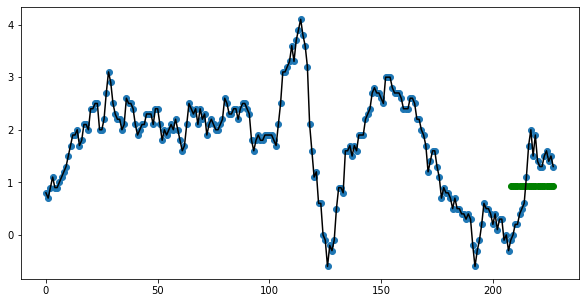

In [143]:
plot_model(model,x_test,y_test)

### Time Laggged Linear Regression

In [144]:
df = pd.read_csv("data.csv")

In [145]:
df["target"] = df["D"].copy()
df["D"] = df["D"].shift(1)

In [146]:
for index, columns in enumerate(["A", "B", "C", "D"]):
    for i in range(4):
        fill_value = df[columns].iloc[0]
        df[f"{columns}_Lag_{i}"] = df[columns].shift(i)

In [147]:
df.drop(["A","B","C","D"],axis=1,inplace=True)

In [148]:
df = df.dropna()

In [149]:
target = df["target"]
df.drop(["target"],axis=1,inplace=True)

In [150]:
scaler = StandardScaler()

In [151]:
scaled= scaler.fit_transform(df)
scaled = pd.DataFrame(scaled, columns= df.columns)

In [152]:
scaled

,A_Lag_0,A_Lag_1,A_Lag_2,A_Lag_3,B_Lag_0,B_Lag_1,B_Lag_2,B_Lag_3,C_Lag_0,C_Lag_1,C_Lag_2,C_Lag_3,D_Lag_0,D_Lag_1,D_Lag_2,D_Lag_3
0,0.222452,0.257475,0.269094,0.304251,0.453617,0.455690,0.411925,0.409698,0.424542,0.418313,0.752626,0.745365,-0.670312,-0.877414,-1.082554,-0.971524
1,0.191196,0.218369,0.253438,0.265083,0.458762,0.455690,0.458336,0.414863,0.424542,0.418313,0.410176,0.745365,-0.881642,-0.666421,-0.872057,-1.076554
2,0.144313,0.187083,0.214297,0.249416,0.710858,0.460840,0.458336,0.461346,0.424542,0.418313,0.410176,0.402034,-0.881642,-0.877414,-0.661561,-0.866494
3,0.105243,0.140155,0.182984,0.210248,0.762306,0.713193,0.463493,0.461346,0.424542,0.418313,0.410176,0.402034,-0.775977,-0.877414,-0.872057,-0.656435
4,0.058360,0.101049,0.136015,0.178913,0.813754,0.764694,0.716177,0.466511,0.424542,0.418313,0.410176,0.402034,-0.670312,-0.771917,-0.872057,-0.866494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,-0.480799,-0.438623,-0.411959,-0.306769,0.813754,0.764694,0.716177,0.667936,-1.277883,-1.289710,-1.302075,-1.314620,-0.458982,-0.455427,-0.345816,0.183802
220,-0.535496,-0.485551,-0.443272,-0.416439,0.865202,0.816195,0.767746,0.719583,-1.277883,-1.289710,-1.302075,-1.314620,-0.247652,-0.455427,-0.451064,-0.341346
221,-0.621449,-0.540300,-0.490241,-0.447773,0.916650,0.867696,0.819314,0.771231,-1.277883,-1.289710,-1.302075,-1.314620,-0.141987,-0.244433,-0.451064,-0.446376
222,-0.676147,-0.626335,-0.545039,-0.494774,0.865202,0.919196,0.870882,0.822878,-1.277883,-1.289710,-1.302075,-1.314620,-0.353317,-0.138936,-0.240568,-0.446376


Data is split into a 2 sets, the training set and the testing set

In [153]:
x_train, x_test, y_train, y_test = train_test_split(scaled,target,shuffle=False,test_size=25)

In [154]:
model = LinearRegression()

In [155]:
model.fit(x_train,y_train)

LinearRegression()

In [156]:
r2_score(y_test, model.predict(x_test))

0.8507820624190253

Next True value: 0.3 Next predicted value: 0.18105404774495204 Relative Error: 39.64865075168265%


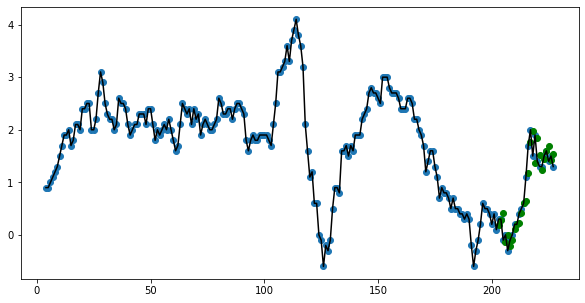

In [157]:
plot_model(model,x_test,y_test)

### Regularisation

In [158]:
df = pd.read_csv("data.csv")

In [159]:
target = df["D"].copy()
df["D"] = target.shift(1,fill_value=target[0])
df.drop("D",axis=1,inplace=True)

In [160]:
x_train, x_test, y_train, y_test = train_test_split(df,target,shuffle=False,test_size=25)

In [161]:
myalphas = np.logspace(-6, 6, 13)

#### Ridge Regression

In [162]:
model = RidgeCV()

In [163]:
ridge_reg = model.fit(x_train,y_train)

In [164]:
r2_score(y_test, ridge_reg.predict(x_test))

-0.12247446986199617

Next True value: 0.3 Next predicted value: 1.1441784011899352 Relative Error: 281.39280039664504%


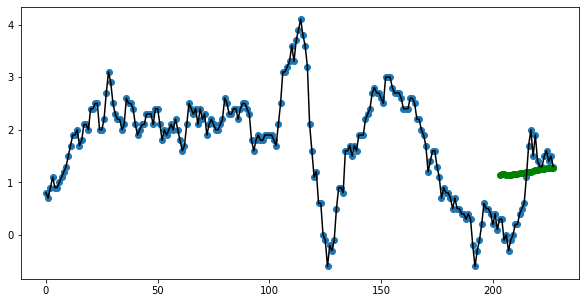

In [165]:
plot_model(ridge_reg,x_test,y_test)

#### Lasso Regression

In [166]:
model = LassoCV(alphas=myalphas)

In [167]:
lasso_reg = model.fit(x_train,y_train)

In [168]:
r2_score(y_test, lasso_reg.predict(x_test))

-0.1552022401343136

Next True value: 0.3 Next predicted value: 1.1526108048270676 Relative Error: 284.20360160902254%


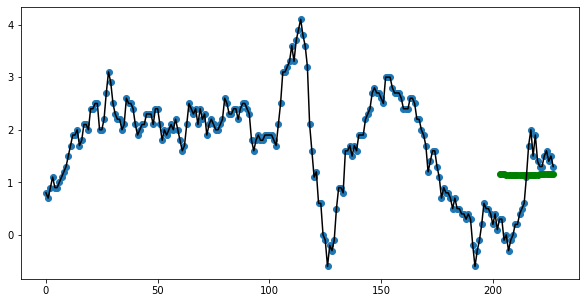

In [169]:
plot_model(lasso_reg,x_test,y_test)

#### Elastic Net Regression

In [170]:
model = ElasticNetCV()

In [171]:
elastic_reg = model.fit(x_train, y_train)

In [172]:
r2_score(y_test, elastic_reg.predict(x_test))

-0.31716269150405596

Next True value: 0.3 Next predicted value: 1.2650480627965257 Relative Error: 321.6826875988419%


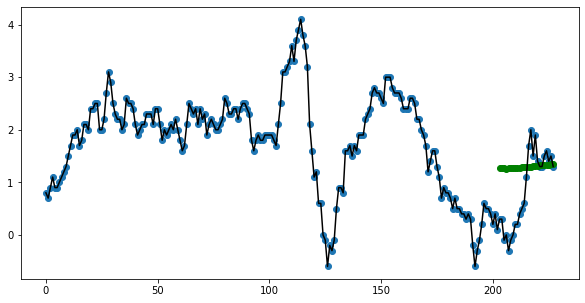

In [173]:
plot_model(elastic_reg, x_test, y_test)

## Polynomial Regression

In [174]:
df = pd.read_csv("data.csv")

In [175]:
target = df["D"].copy()
df["D"] = target.shift(1,fill_value=target[0])
df.drop("D",axis=1,inplace=True)

In [176]:
x_train, x_test, y_train, y_test = train_test_split(df.tail(50),target.tail(50),shuffle=False,test_size=20)

In [177]:
model = make_pipeline(PolynomialFeatures(4),Ridge())

In [178]:
poly_regression = model.fit(x_train, y_train)

In [179]:
r2_score(y_test, poly_regression.predict(x_test))

-193.80154859796994

Next True value: -0.1 Next predicted value: -0.27498282260097007 Relative Error: 174.98282260097005%


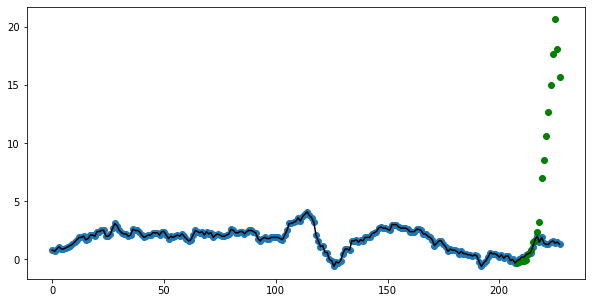

In [180]:
plot_model(poly_regression,x_test,y_test)

## Piecewise Regression

In [182]:
df = pd.read_csv("data.csv")

In [183]:
target = df["D"].copy()
df["D"] = target.shift(1,fill_value=target[0])
df.drop("D",axis=1,inplace=True)

In [226]:
x_train, x_test, y_train, y_test = train_test_split(df.tail(100),target.tail(100),shuffle=False,test_size=10)

In [227]:
ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

In [228]:
def SegmentedLinearReg( X, Y, breakpoints ):
    nIterationMax = 10

    breakpoints = np.sort( np.array(breakpoints) )

    dt = np.min( np.diff(X) )
    ones = np.ones_like(X)

    for i in range( nIterationMax ):
        # Linear regression:  solve A*p = Y
        Rk = [ramp( X - xk ) for xk in breakpoints ]
        Sk = [step( X - xk ) for xk in breakpoints ]
        A = np.array([ ones, X ] + Rk + Sk )
        p =  lstsq(A.transpose(), Y, rcond=None)[0]

        # Parameters identification:
        a, b = p[0:2]
        ck = p[ 2:2+len(breakpoints) ]
        dk = p[ 2+len(breakpoints): ]

        # Estimation of the next break-points:
        newBreakpoints = breakpoints - dk/ck

        # Stop condition
        if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5:
            break

        breakpoints = newBreakpoints
    else:
        print( 'maximum iteration reached' )

    # Compute the final segmented fit:
    Xsolution = np.insert( np.append( breakpoints, max(X) ), 0, min(X) )
    ones =  np.ones_like(Xsolution)
    Rk = [ c*ramp( Xsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    Ysolution = a*ones + b*Xsolution + np.sum( Rk, axis=0 )

    return Xsolution, Ysolution

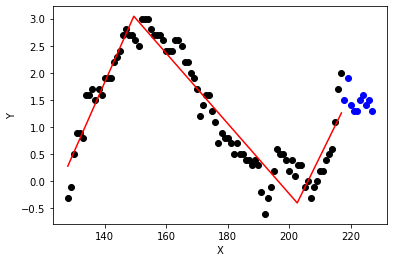

In [241]:
plt.plot( x_train.index, y_train, 'ok' );
plt.scatter(y_test.index, y_test,color="blue")
initialBreakpoints = [140,200]
#Try also with 3 breakpoints, e.g. [3,5,6]
model_prediction = SegmentedLinearReg( x_train.index, y_train, initialBreakpoints )
plt.plot( *model_prediction, '-r' );
plt.xlabel('X'); plt.ylabel('Y');

# 2. Descriptive statistics and dimensionality reduction

In [497]:
pca = PCA(n_components=12,svd_solver = 'full')

In [498]:
pca.fit(df)

PCA(n_components=12, svd_solver='full')

In [499]:
pca_df = pd.DataFrame(pca.fit_transform(df))

In [500]:
df.var(axis=0).sort_values(ascending=False)

B_Lag_0      3.739286e+00
B_Lag_49     3.732974e+00
B_Lag_48     3.732835e+00
B_Lag_50     3.732389e+00
B_Lag_51     3.730975e+00
                 ...     
D_Lag_227    3.577893e-30
A_Lag_227    3.169344e-30
C_Lag_225    0.000000e+00
C_Lag_226    0.000000e+00
C_Lag_227    0.000000e+00
Length: 912, dtype: float64

In [501]:
print(f"Total Variance for normal data: {pd.Series(df.var(axis=0)).sum()}")

Total Variance for normal data: 858.6203648832986


In [502]:
print(f"Total Variance for PCA data: {pca_df.var(axis=0).sum()}")

Total Variance for PCA data: 816.107530042386


## 1.2 PCA Calulation

### Steps
1. Centre Matrix
2. Calculate the covariance matrix
3. Calculate eigenvectors & eigenvalues of the covariance matrix
4. Select the first n eigenvectors


In [504]:
mean_df = np.mean(df.T,axis=1)

In [505]:
centre =df - mean_df

In [506]:
covariance = np.cov(df.T)

In [507]:
centre

,A_Lag_0,A_Lag_1,A_Lag_2,A_Lag_3,A_Lag_4,A_Lag_5,A_Lag_6,A_Lag_7,A_Lag_8,A_Lag_9,...,D_Lag_218,D_Lag_219,D_Lag_220,D_Lag_221,D_Lag_222,D_Lag_223,D_Lag_224,D_Lag_225,D_Lag_226,D_Lag_227
0,0.467807,0.461798,0.455921,0.450351,0.445263,0.440482,0.435965,0.431623,0.427895,0.424298,...,-0.00614,-0.004386,-0.00307,-0.002193,-0.001754,-0.001316,-1.776357e-15,0.000439,-1.887379e-15,-1.887379e-15
1,0.397807,0.461798,0.455921,0.450351,0.445263,0.440482,0.435965,0.431623,0.427895,0.424298,...,-0.00614,-0.004386,-0.00307,-0.002193,-0.001754,-0.001316,-1.776357e-15,0.000439,-1.887379e-15,-1.887379e-15
2,0.347807,0.391798,0.455921,0.450351,0.445263,0.440482,0.435965,0.431623,0.427895,0.424298,...,-0.00614,-0.004386,-0.00307,-0.002193,-0.001754,-0.001316,-1.776357e-15,0.000439,-1.887379e-15,-1.887379e-15
3,0.327807,0.341798,0.385921,0.450351,0.445263,0.440482,0.435965,0.431623,0.427895,0.424298,...,-0.00614,-0.004386,-0.00307,-0.002193,-0.001754,-0.001316,-1.776357e-15,0.000439,-1.887379e-15,-1.887379e-15
4,0.277807,0.321798,0.335921,0.380351,0.445263,0.440482,0.435965,0.431623,0.427895,0.424298,...,-0.00614,-0.004386,-0.00307,-0.002193,-0.001754,-0.001316,-1.776357e-15,0.000439,-1.887379e-15,-1.887379e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-0.622193,-0.568202,-0.534079,-0.399649,-0.374737,-0.179518,-0.124035,-0.038377,0.047895,0.174298,...,0.09386,0.295614,0.09693,-0.102193,-0.001754,-0.001316,-1.776357e-15,0.000439,-1.887379e-15,-1.887379e-15
224,-0.692193,-0.628202,-0.574079,-0.539649,-0.404737,-0.379518,-0.184035,-0.128377,-0.042105,0.044298,...,0.09386,0.095614,0.29693,0.097807,-0.101754,-0.001316,-1.776357e-15,0.000439,-1.887379e-15,-1.887379e-15
225,-0.802193,-0.698202,-0.634079,-0.579649,-0.544737,-0.409518,-0.384035,-0.188377,-0.132105,-0.045702,...,0.19386,0.095614,0.09693,0.297807,0.098246,-0.101316,-1.776357e-15,0.000439,-1.887379e-15,-1.887379e-15
226,-0.872193,-0.808202,-0.704079,-0.639649,-0.584737,-0.549518,-0.414035,-0.388377,-0.192105,-0.135702,...,0.29386,0.195614,0.09693,0.097807,0.298246,0.098684,-1.000000e-01,0.000439,-1.887379e-15,-1.887379e-15


In [508]:
covariance

array([[1.61888151e+00, 1.61379207e+00, 1.60351657e+00, ...,
        3.97441842e-04, 0.00000000e+00, 0.00000000e+00],
       [1.61379207e+00, 1.61622362e+00, 1.61121794e+00, ...,
        3.86873020e-04, 0.00000000e+00, 0.00000000e+00],
       [1.60351657e+00, 1.61121794e+00, 1.61373087e+00, ...,
        3.58625087e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.97441842e-04, 3.86873020e-04, 3.58625087e-04, ...,
        4.38596491e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [509]:
eigenvalues,eigenvectors = np.linalg.eig(covariance)

In [510]:
idx = eigenvalues.argsort()[::-1]

In [511]:
eigenvalues = eigenvalues[idx]

In [512]:
eigenvectors = eigenvectors[:,idx]

In [513]:
principals = eigenvectors.T.dot(centre.T)

In [514]:
principals.T[:,0:4]

array([[ 8.06210427e+00+0.j, -6.26431188e+00+0.j, -1.27266099e+00+0.j,
         3.57213942e+00+0.j],
       [ 8.06542003e+00+0.j, -6.26986619e+00+0.j, -1.27365121e+00+0.j,
         3.57383791e+00+0.j],
       [ 8.06781954e+00+0.j, -6.27823640e+00+0.j, -1.27934771e+00+0.j,
         3.57854388e+00+0.j],
       [ 8.04007376e+00+0.j, -6.28042016e+00+0.j, -1.28182733e+00+0.j,
         3.56158098e+00+0.j],
       [ 8.02199576e+00+0.j, -6.28751713e+00+0.j, -1.27569632e+00+0.j,
         3.54146479e+00+0.j],
       [ 7.99932263e+00+0.j, -6.29550273e+00+0.j, -1.27683411e+00+0.j,
         3.52589443e+00+0.j],
       [ 7.97731555e+00+0.j, -6.33599497e+00+0.j, -1.27872681e+00+0.j,
         3.50757504e+00+0.j],
       [ 7.96230374e+00+0.j, -6.38741949e+00+0.j, -1.27504445e+00+0.j,
         3.48718436e+00+0.j],
       [ 7.95512628e+00+0.j, -6.45034432e+00+0.j, -1.26531551e+00+0.j,
         3.46559884e+00+0.j],
       [ 7.95284818e+00+0.j, -6.56518255e+00+0.j, -1.25074795e+00+0.j,
         3.43854096e

In [515]:
pca.explained_variance_ratio_

array([0.28500293, 0.12987233, 0.11763366, 0.11256116, 0.09580389,
       0.08312435, 0.03927419, 0.02808612, 0.01750836, 0.01535912,
       0.01426452, 0.0119964 ])

In [516]:
pca.components_

array([[ 4.89692564e-02,  5.05804607e-02,  5.21504048e-02, ...,
        -4.40632771e-05,  0.00000000e+00,  0.00000000e+00],
       [ 6.25639856e-02,  6.09702010e-02,  5.92217987e-02, ...,
         6.43098664e-05,  0.00000000e+00,  0.00000000e+00],
       [ 1.34536337e-02,  1.29099794e-02,  1.23410151e-02, ...,
        -3.02171567e-05, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 1.17643967e-02,  9.86154777e-03,  8.30500647e-03, ...,
        -1.08307103e-04, -0.00000000e+00, -0.00000000e+00],
       [ 2.95222993e-02,  2.71448258e-02,  2.44086250e-02, ...,
         2.29255562e-04, -0.00000000e+00, -0.00000000e+00],
       [ 3.82707958e-02,  3.12527232e-02,  2.52544181e-02, ...,
        -2.25480573e-04,  0.00000000e+00,  0.00000000e+00]])

# 3 Predicting light source direction from face images with a CNN

In [517]:
df = pd.read_csv("deeplearning/train/labels.csv",header=None)

In [518]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
le = LabelEncoder()

In [519]:
def show_face(image, camera_position):
    """Show image with landmarks"""
    plt.title(camera_position)
    plt.imshow(image,cmap="gray")
    plt.pause(0.001)  # pause a bit so that plots are updated

In [520]:
def encode_dataframe(df):
    df[4] = df[1].astype(str) + "," + df[2].astype(str) +","+ df[3].astype(str)
    df[4]  = le.fit_transform(df[4])
    return df

In [521]:
class FaceDataset(Dataset):
    """Custom Fashion MNIST dataset."""

    def __init__(self, csv_file, image_dir,):
        self.labels_df = pd.read_csv(csv_file,header=None)
        self.labels_df = encode_dataframe(self.labels_df)
        self.transform = transform
        self.image_dir = image_dir

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.image_dir,
                                self.labels_df.iloc[idx, 0])
        image = io.imread(img_name, as_gray=True)
        image = transform.resize(image,(160,160))
        convert_tensor = transforms.ToTensor()
        image = convert_tensor(image)
        image.unsqueeze(0)
        camera_position = torch.tensor(self.labels_df.iloc[idx, 4])
        camera_position =  camera_position.type(torch.LongTensor)





        return image.float(), camera_position,img_name

In [522]:
df2 = pd.read_csv("deeplearning/train/labels.csv",header=None)

In [523]:
encode_dataframe(df2).sort_values(by=4)

,0,1,2,3,4
249,0250.jpg,-0.087156,-0.996195,0.0,0
937,0938.jpg,-0.087156,-0.996195,0.0,0
1703,1704.jpg,-0.087156,-0.996195,0.0,0
313,0314.jpg,-0.087156,-0.996195,0.0,0
1127,1128.jpg,-0.087156,-0.996195,0.0,0
...,...,...,...,...,...
1518,1519.jpg,1.000000,0.000000,0.0,63
1070,1071.jpg,1.000000,0.000000,0.0,63
1134,1135.jpg,1.000000,0.000000,0.0,63
1582,1583.jpg,1.000000,0.000000,0.0,63


In [524]:
batch_size=32

In [525]:
train_dataset = FaceDataset(csv_file='deeplearning/train/labels.csv',
                            image_dir='deeplearning/train')

In [526]:
test_dataset = FaceDataset(csv_file='deeplearning/validate/labels.csv',
                           image_dir='deeplearning/validate')

In [527]:
train_split, validation_split = random_split(train_dataset,[1470,368])

In [528]:
train_dataloader = DataLoader(train_split, batch_size=batch_size,
                              shuffle=True, num_workers=0)

In [529]:
validation_dataloader = DataLoader(validation_split, batch_size=batch_size,
                                   shuffle=True, num_workers=0)

In [530]:
test_dataloader = DataLoader(test_dataset, batch_size=batch_size,
                             shuffle=False, num_workers=0)

In [531]:
def label_decode(label):
    temp = le.inverse_transform(label)
    temp = temp.reshape(1,-1).flatten()
    temp = temp[0].split(",")

    return torch.tensor(np.array(temp).astype(float))

In [532]:
def angular_error(output,label):
    total_error  = 0
    for output_val,predic_val in zip(map(label_decode,[ [x] for x in output]),map(label_decode,[[x] for x in label])):
        total_error += torch.acos(torch.min(torch.tensor(1),torch.max(torch.tensor(-1),torch.dot(output_val,predic_val))))
    return torch.rad2deg(total_error)

In [533]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.convlayers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(6),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2), # B x 6 x 80 x 80 after this maxpool
            nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.Dropout(0.1),


            nn.MaxPool2d(kernel_size=2, stride=4), # B x 12 x20 x 20,
            nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=0),# B x 48 x 18x 18,
            nn.BatchNorm2d(24),
            nn.ReLU()



        )

        self.MLP = nn.Sequential(
            nn.Linear(in_features=24*18*18,out_features=120),
            nn.BatchNorm1d(120),
            nn.ReLU(),
            nn.Linear(in_features=120,out_features=84),
            nn.BatchNorm1d(84),
            nn.ReLU(),
            nn.Linear(in_features=84,out_features=64)
        )

    def forward(self, x):
        residual = x
        # Input x has dimensions B x 1 x 28 x 28, B is batch size
        x = self.convlayers(x)
        x = x.view(x.size(0), -1)
        x = self.MLP(x)
        # Output has dimensions B x 10
        return x

model = CNN()
model.to(device)
loss_func = nn.CrossEntropyLoss()

In [536]:
num_epochs = 25
learning_rate =0.01

In [ ]:


# Set up the optimiser
optim = torch.optim.Adam(model.parameters(), lr = learning_rate)
images,labels, _= next(iter(train_dataloader))
# Initialise some variables for computing and tracking stats
iterations_per_epoch = math.ceil(len(train_dataset)/batch_size)
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []
for epoch in range(num_epochs):

    # One epoch on the training set
    total_loss = 0
    correct = 0
    total = 0
    total_loss = 0
    angle_error = 0
    for i, (inputs, labels,_) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        output = model(inputs)
        loss = loss_func(output,labels)
        optim.zero_grad()
        loss.backward()
        optim.step()
        pred_y = torch.argmax(output, 1)
        angle_error += angular_error(pred_y.to("cpu"),labels.to("cpu"))
        correct += (pred_y == labels).sum()
        total += float(labels.size(0))
        total_loss += loss*images.shape[0]
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Iteration [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, iterations_per_epoch, loss.item()))
    total_loss /= len(train_dataset)
    training_losses.append(total_loss.item())
    training_accuracies.append(correct/total)
    print('Train accuracy over epoch {}: {:.4f}'.format(epoch+1,training_accuracies[-1]))
    print(f"Mean Angular Error ={angle_error/len(train_dataset)}")

    # One epoch on the validation set
    correct = 0
    total = 0
    # Switch to evaluation mode
    model.eval()
    with torch.no_grad():
        for inputs, labels,_ in validation_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs)
            loss = loss_func(output,labels)
            pred_y = torch.argmax(output, 1)
            correct += (pred_y == labels).sum()
            total += float(labels.size(0))
            total_loss += loss*images.shape[0]
        validation_accuracy = correct/total
    total_loss /= len(validation_split)
    validation_losses.append(total_loss.item())
    # Switch back to training mode
    model.train()
    validation_accuracies.append(validation_accuracy)
    print('Test accuracy at epoch {}: {:.4f}'.format(epoch+1,validation_accuracy))

NameError: name 'math' is not defined

In [ ]:
plt.title("Training curve")
plt.plot(range(len(training_losses)),training_losses,'r')
plt.plot(range(len(validation_losses)),validation_losses,'g')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
angle_errors = []
for index, (images, labels,image_names) in enumerate(test_dataloader):
    images,labels = images.to(device), labels.to(device)
    output = model(images)
    pred_y = torch.argmax(output, 1)
    figure = plt.figure(figsize=(30, 15))
    for i in range(32):
        figure.add_subplot(8, 4, i+1)
        error = torch.acos(torch.min(torch.tensor(1),torch.max(torch.tensor(-1),torch.dot(label_decode([pred_y[i].item()]),label_decode([labels[i].item()])))))
        angle_errors.append(error)
        plt.title(f"{image_names[i]} \n Y': {le.inverse_transform([pred_y[i].item()])} \n Y: {le.inverse_transform([labels[i].item()])} \n Error = {error}")
        plt.axis("off")
        plt.imshow(images[i,:].squeeze().cpu(), cmap="gray")
    figure.tight_layout()
    plt.tight_layout()
    plt.show()
error = sum(angle_errors)/len(angle_errors)
error = np.asarray(error)
print(f" Mean Angle Error is :{np.round(error,2)}")

# 4 Generating face images with controllable lighting

In [538]:
train_dataset = FaceDataset(csv_file='deeplearning/train/labels.csv',
                            image_dir='deeplearning/train')
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

In [ ]:
batch_size = 8
nz = 100
ngf = 128
ndf = 128
num_epochs = 7
lr = 0.001
beta1 = 0.5


In [539]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, 1, 4, 2, 1),
            nn.Tanh()
            # (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

netG = Generator()
netG = netG.to(device)

NameError: name 'nz' is not defined

In [540]:
class Discriminator(nn.Module):
def __init__(self, ):
    super(Discriminator, self).__init__()
    self.main = nn.Sequential(
        # input is (nc) x 64 x 64
        nn.Conv2d(1, ndf, 4, 2, 1),
        nn.LeakyReLU(0.2, inplace=True),
        # state size. (ndf) x 32 x 32
        nn.Conv2d(ndf, ndf * 2, 4, 2, 1),
        nn.BatchNorm2d(ndf * 2),
        nn.LeakyReLU(0.2, inplace=True),
        # state size. (ndf*2) x 16 x 16
        nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1),
        nn.BatchNorm2d(ndf * 4),
        nn.LeakyReLU(0.2, inplace=True),
        # state size. (ndf*4) x 8 x 8
        nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1),
        nn.BatchNorm2d(ndf * 8),
        nn.LeakyReLU(0.2, inplace=True),
        # state size. (ndf*8) x 4 x 4
        nn.Conv2d(ndf * 8, 1, 4, 1, 0),
        nn.Sigmoid()
    )

def forward(self, input):
    return self.main(input)

netD = Discriminator()
netD = netD.to(device)

SyntaxError: invalid syntax (Temp/ipykernel_69068/3301265834.py, line 1)

In [ ]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(8, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [ ]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(utils.make_grid(fake, padding=2, normalize=True))

        iters += 1

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(utils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

In [ ]:
# Solution

nsamples = 7
z1 = torch.randn(1, nz, 1, 1, device=device)
z2 = torch.randn(1, nz, 1, 1, device=device)
z = torch.zeros(nsamples,nz,1,1,device=device)
for i in range(nsamples):
    w1 = i/(nsamples-1)
    w2 = 1-w1
    z[i,:,:,:] = w1*z1 + w2*z2
images = netG(z)

figure = plt.figure(figsize=(20, 20))
for i in range(nsamples):
    figure.add_subplot(1, nsamples, i+1)
    plt.axis("off")
    fake_image = np.transpose(images[i].detach().cpu(),(1,2,0))
    plt.imshow(fake_image, cmap="gray")
plt.show()
